
## Libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [86]:
pwd

'C:\\Users\\Vishnu\\Desktop\\practice\\ds exercise\\Fraud Detection'

# importing dataset

In [87]:
cc_data=pd.read_csv('C:\\Users\\Vishnu\\Desktop\\practice\\ds exercise\\Fraud Detection\\creditcard.csv')

In [88]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [89]:
# this means that '0' is a legit transaction and '1' is a fraud transaction.
cc_data['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [90]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [91]:
# to check whether there are any null values in the dataset 
cc_data.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [92]:
# this means that '0' is a Normal transaction and '1' is a fraud transaction.
counts=pd.DataFrame(cc_data['Class'].value_counts())
counts

,count
Class,
0,284315
1,492


Text(0.5, 0.98, 'Count for number of normal and fraud transactions ')

<Figure size 640x480 with 0 Axes>

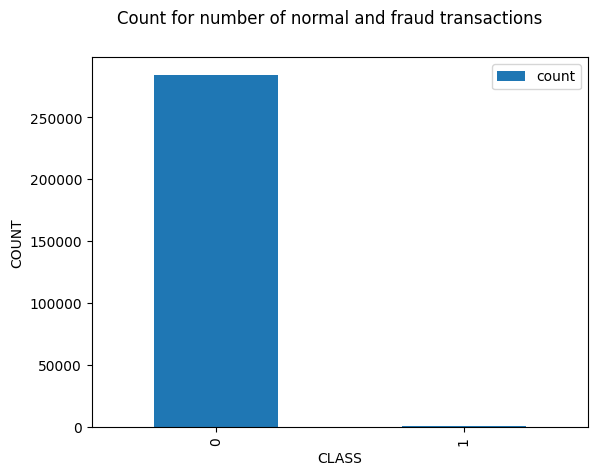

In [93]:
plt.figure()
counts.plot(kind='bar')
plt.xlabel('CLASS')
plt.ylabel('COUNT')
plt.suptitle('Count for number of normal and fraud transactions ')

## Now we distribute the dataset based on class('0' & '1') where we create 2 datasets namely 'normal_T' ( legit transactions) and 'fraud_T'(fraud transactions)

### Note: The two datasets are not balanced yet..

In [94]:
normal_T=cc_data[cc_data['Class']==0]
normal_T.sample(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
96432,65765.0,0.923633,-0.512731,1.389515,0.849724,-1.483432,-0.554024,-0.602934,0.003573,0.659184,...,0.325517,0.717391,-0.109495,0.786208,0.129802,0.436015,-0.000213,0.058773,134.70,0
241614,151098.0,2.058141,0.057025,-1.692533,0.445111,0.284534,-0.881126,0.084899,-0.142796,0.683237,...,-0.367399,-1.010501,0.373608,0.543460,-0.329890,0.175287,-0.067957,-0.032817,1.98,0
129848,79224.0,1.202623,-0.501849,0.852440,-0.760845,-1.152587,-0.389441,-0.748612,0.187618,2.036916,...,-0.001357,0.210131,0.011247,0.058429,0.378352,-0.652034,0.100666,0.028775,1.00,0
123451,76932.0,1.002251,0.140405,0.543150,1.371565,-0.392477,-0.657905,0.235896,-0.171309,-0.213019,...,0.191859,0.504871,-0.094883,0.654071,0.534751,-0.296021,0.027028,0.039919,82.90,0


In [95]:
fraud_T=cc_data[cc_data['Class']==1]
fraud_T.sample(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15225,26585.0,-19.856322,12.095893,-22.464083,6.115541,-15.148022,-4.346724,-15.648507,13.276805,-3.974162,...,1.750730,-1.409636,-0.809809,0.121397,1.350300,-0.224292,1.597621,0.476920,99.99,1
140786,83934.0,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,-2.743539,...,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,1.00,1
251904,155554.0,-1.040067,3.106703,-5.409027,3.109903,-0.887237,-2.497522,-2.073347,0.639818,-3.013331,...,0.773961,0.214868,-0.184233,-0.284091,0.493467,0.732329,0.675067,0.337076,94.82,1
215984,140308.0,-4.861747,-2.722660,-4.656248,2.502005,-2.008346,0.615422,-3.485680,1.878856,-1.116268,...,1.138876,1.033664,-0.806199,-1.511046,-0.191731,0.080999,1.215152,-0.923142,592.90,1


In [96]:
print(normal_T.shape,fraud_T.shape)

(284315, 31) (492, 31)


In [97]:
normal_T['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [98]:
fraud_T['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

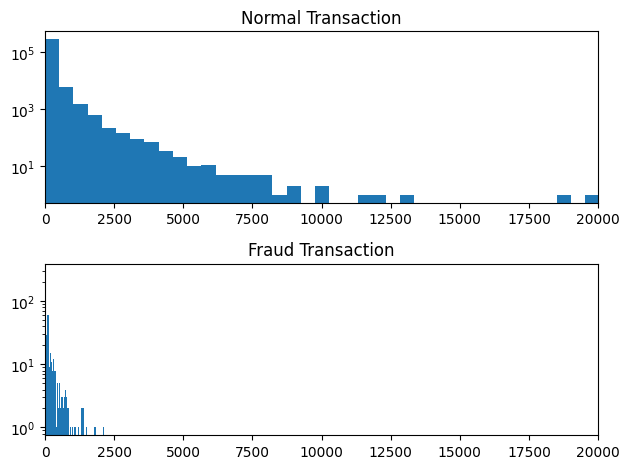

In [99]:
f,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
ax1.hist(x=normal_T['Amount'],bins=50)
ax1.set_xlim(0,20000)
ax1.set_yscale('log')
ax1.set_title('Normal Transaction')
ax2.hist(x=fraud_T['Amount'],bins=50)
ax2.set_xlim(0,20000)
ax2.set_yscale('log')
ax2.set_title('Fraud Transaction')
f.tight_layout()
f.savefig()

In [100]:
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


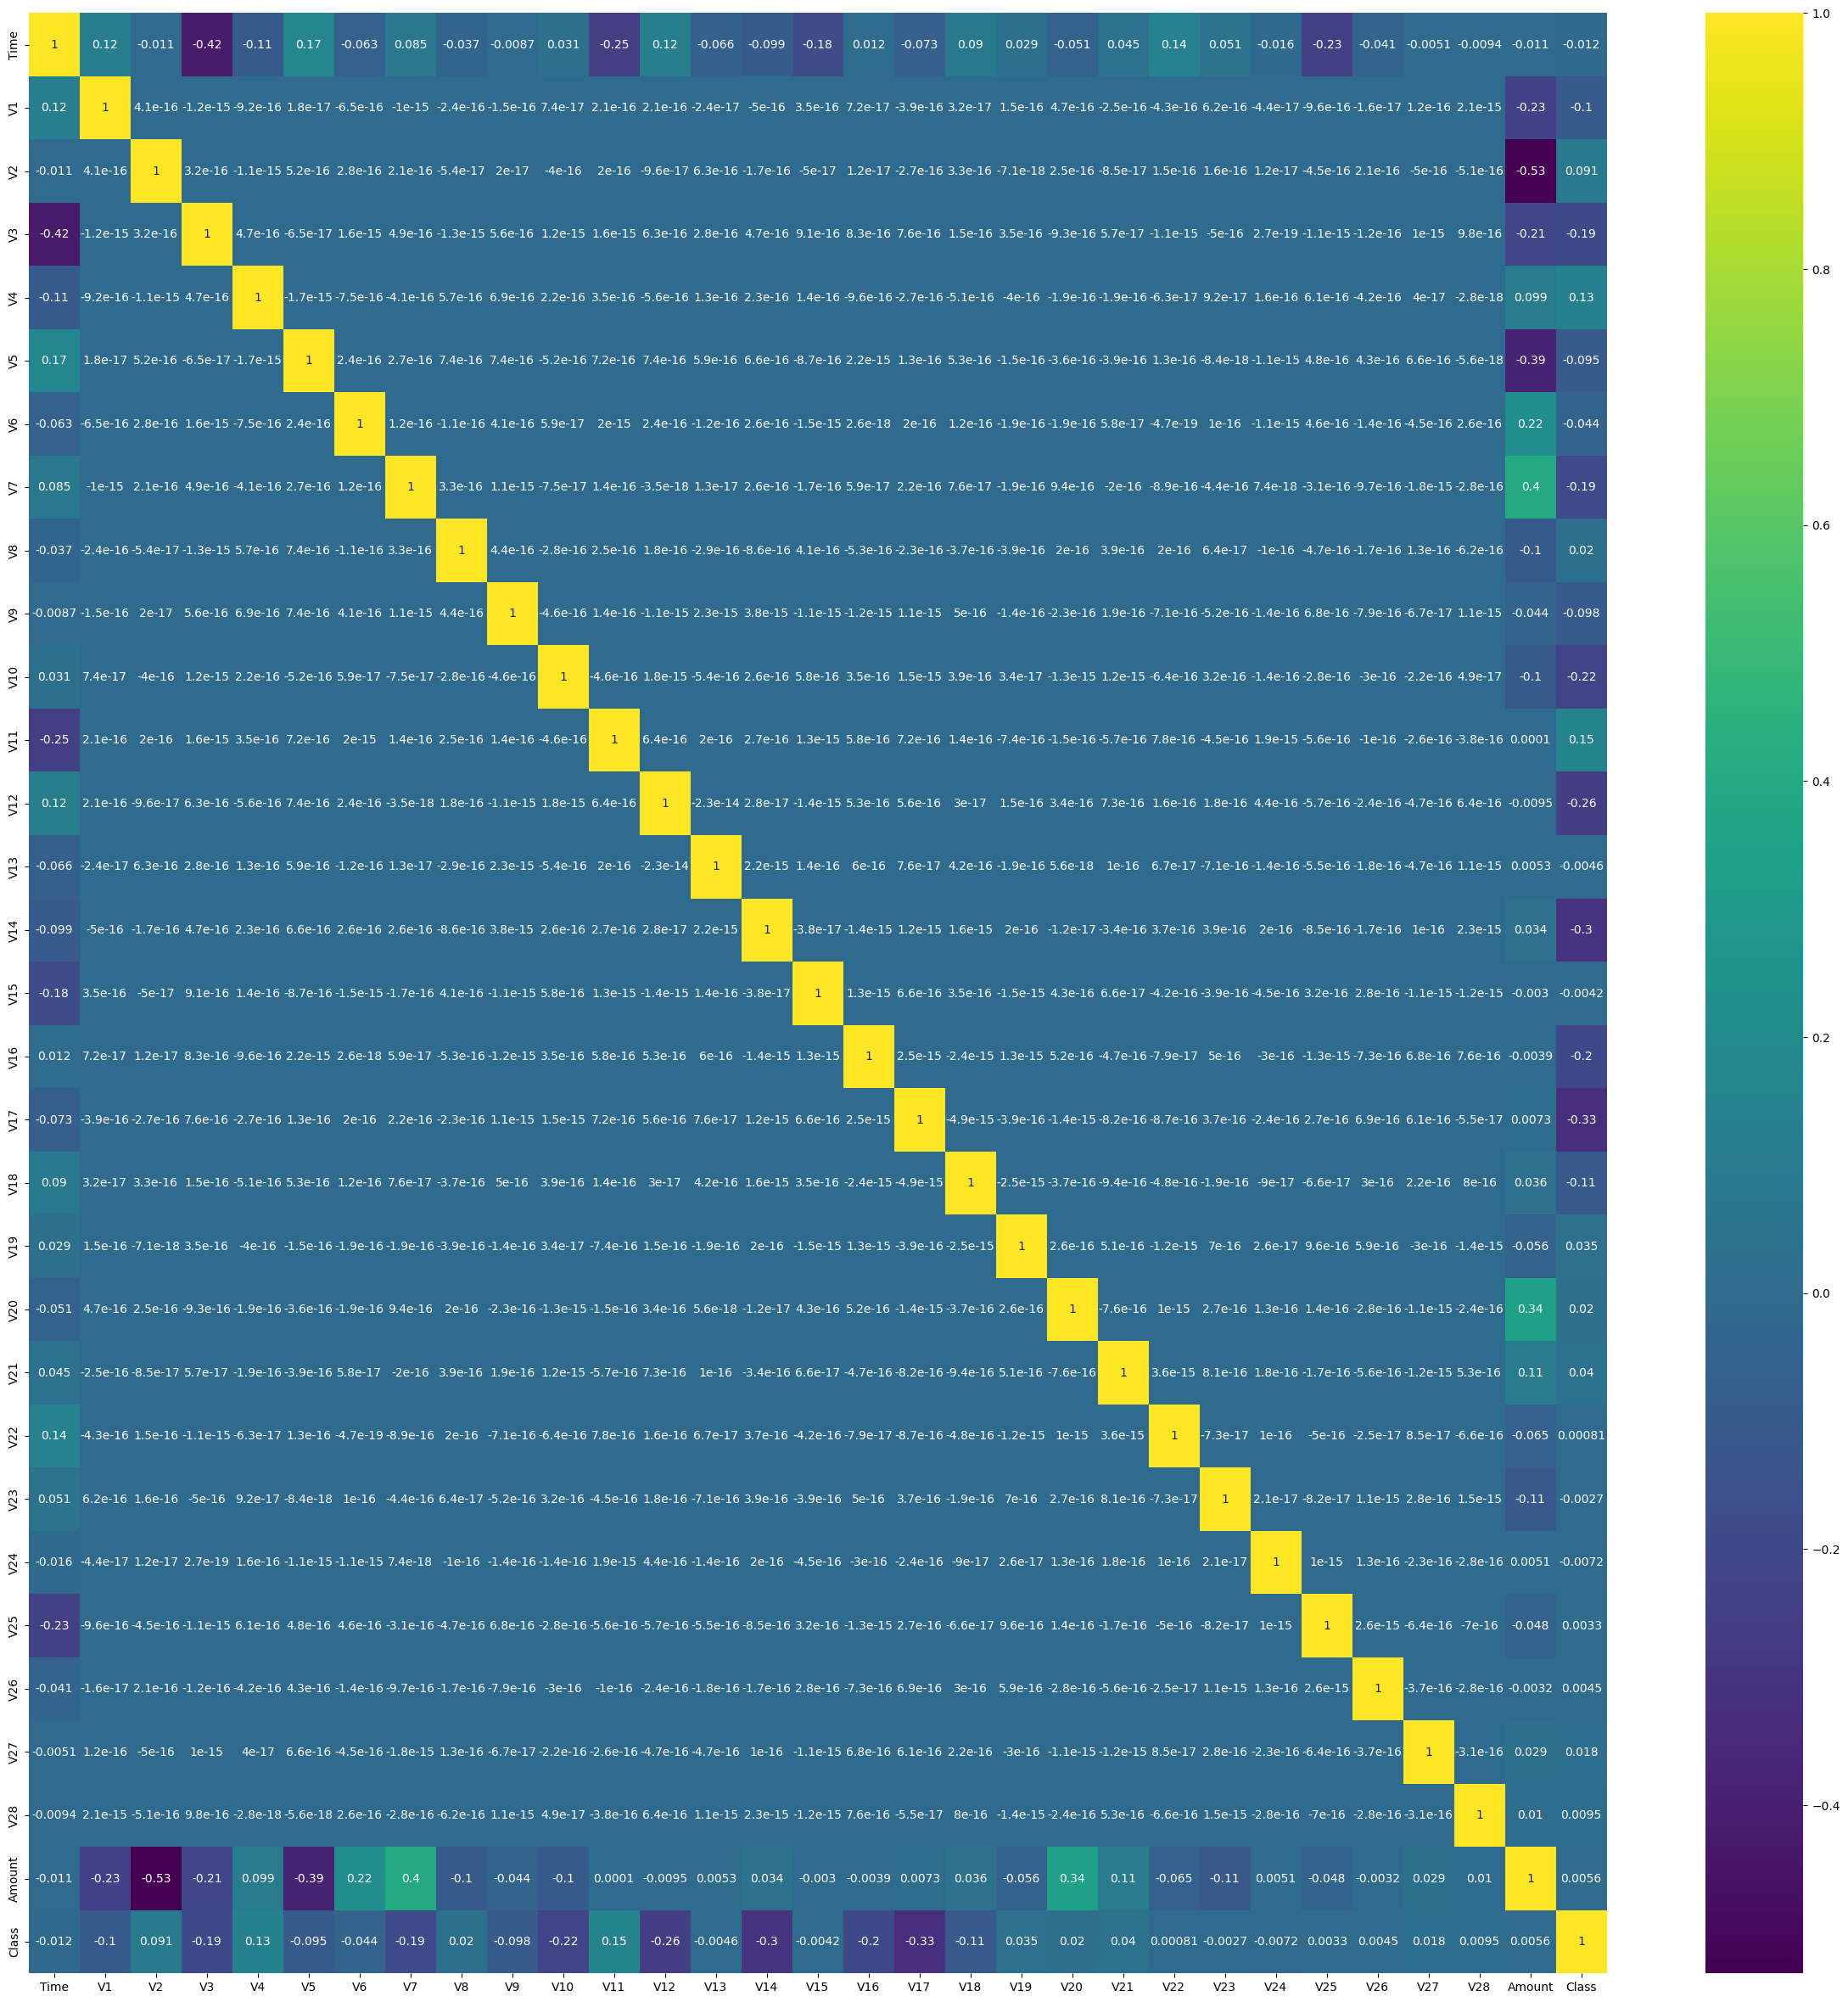

In [106]:
plt.figure(figsize=(30,30))
#heat map
g=sb.heatmap(cc_data.corr(),annot=True,cmap="viridis")
plt.savefig('DATA correaltion')

## Time to balance the dataset(balancing 'normal_T') by random sampling method 
### Sampling to get a balanced dataset as 'fraud_T'

In [107]:
normal_T_sample=normal_T.sample(492)
normal_T_sample.sample(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
270471,164092.0,1.606955,-0.510496,-2.980344,1.147615,1.155154,-0.475971,1.248286,-0.399204,-0.441097,...,0.457963,0.826369,-0.502120,0.135328,0.835070,-0.235062,-0.117347,-0.044177,265.00,0
202162,134199.0,2.017700,0.033296,-1.626614,0.356414,0.284716,-0.689398,0.013080,-0.039715,0.386184,...,-0.312983,-0.886908,0.363388,0.640021,-0.350113,0.146199,-0.073423,-0.041029,1.98,0
35042,37932.0,1.122291,0.110166,0.326326,1.026361,-0.293279,-0.327340,-0.064062,0.137155,-0.028045,...,0.106231,0.240556,-0.044795,0.188667,0.493805,-0.323971,0.013115,0.006872,14.90,0
170970,120435.0,-5.738663,5.513930,-2.355845,-2.417009,0.924332,1.165504,-0.068587,-7.572686,5.235586,...,5.486830,-1.053542,0.689438,-0.310877,0.294641,-0.335134,1.253884,-0.485115,0.77,0


In [108]:
new_cc_data=pd.concat([normal_T_sample,fraud_T],axis=0)
new_cc_data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43204,41413.0,-15.140450,7.378042,-16.356367,9.194935,-13.466163,-2.958431,-16.165539,10.075254,-7.901821,...,3.147428,0.341678,-1.150162,0.795190,-0.194542,0.145964,-2.458680,-1.189888,106.55,1
15566,26961.0,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99,1
67085,52360.0,-2.449366,0.845747,1.591778,0.771176,-1.125180,0.030654,-0.449553,-2.636089,0.827975,...,2.391641,0.088663,0.545783,0.952962,-0.217046,0.474618,-0.558462,0.531046,59.90,0
124087,77171.0,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,-0.038339,...,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,1.00,1
239941,150350.0,2.000811,-1.200437,-0.556223,-0.981588,-1.011474,-0.204817,-1.013539,-0.050226,-0.286654,...,0.479331,1.285029,-0.019055,-0.417614,-0.157137,-0.068441,0.004882,-0.043288,89.95,0
202162,134199.0,2.017700,0.033296,-1.626614,0.356414,0.284716,-0.689398,0.013080,-0.039715,0.386184,...,-0.312983,-0.886908,0.363388,0.640021,-0.350113,0.146199,-0.073423,-0.041029,1.98,0
55401,46925.0,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,...,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1.00,1
42741,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
24890,33426.0,1.163553,-0.516912,1.190745,-0.806642,-1.459644,-0.577457,-0.915159,0.168179,1.915359,...,0.307123,1.027280,-0.035362,0.401210,0.336308,-0.538682,0.114115,0.039541,8.49,0
106832,70149.0,-1.570332,0.506446,1.644021,1.483218,-0.411033,0.124525,-0.226319,0.557831,0.532586,...,-0.140636,0.352590,0.264952,0.321964,0.103445,-0.200236,0.244949,-0.125011,8.99,0


In [109]:
new_cc_data.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

### The datasets are balanced now and ready to go through train and test

In [110]:
new_cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93199.729675,0.059687,-0.027869,0.050335,-0.036141,-0.021773,-0.037459,0.050393,0.009309,0.010495,...,-0.002876,-0.021873,0.020085,-0.002654,-0.00222,0.008540,-0.006136,0.009022,0.007176,86.748720
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [111]:
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting data into Train and Test 

In [112]:
X=new_cc_data.drop('Class',axis=1)
Y=new_cc_data['Class']

In [113]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,stratify=Y,random_state=2)

### the dataset is divided into train and test 

In [114]:
X.shape,Y.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((984, 30), (984,), (787, 30), (197, 30), (787,), (197,))

# Model 

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import cross_val_score

In [116]:
model = LogisticRegression()

In [117]:
model.fit(X_train,Y_train)

C:\Users\Vishnu\anaconda3\envs\requirements\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## model evaluation 

#### creating accuracy report for train data 


In [118]:


X_train_predict= model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict,Y_train)


In [119]:
training_data_accuracy

0.9491740787801779

In [120]:
f1score_train=f1_score(X_train_predict,Y_train)
f1score_train

0.947780678851175

In [121]:
roc_score_train=roc_auc_score(X_train_predict,Y_train)
roc_score_train

0.9505538282160901

In [122]:
precision_train=precision_score(X_train_predict,Y_train)
precision_train

0.9213197969543148

In [123]:
recall_train=recall_score(X_train_predict,Y_train)
recall_train

0.9758064516129032

In [124]:
score_train=pd.DataFrame(data={training_data_accuracy,f1score_train,roc_score_train,recall_train},index=['training_data_accuracy','f1score_train','roc_score_train','recall_train'],columns=['TRAIN DATA'])
score_train

,TRAIN DATA
training_data_accuracy,0.949174
f1score_train,0.947781
roc_score_train,0.975806
recall_train,0.950554


In [125]:
score_train['TRAIN DATA'].mean()

0.9558287593650866

(0.8, 1.0)

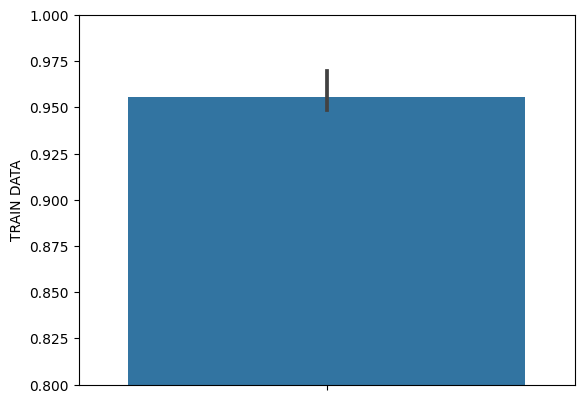

In [126]:
plt.figure()
sb.barplot(score_train,y='TRAIN DATA')
plt.ylim(0.8,1.0)

#### creating accuracy report for test data

In [127]:
X_test_predict=model.predict(X_test)
test_accuracy=accuracy_score(X_test_predict,Y_test)

In [128]:
test_accuracy

0.9238578680203046

In [129]:
f1score_test=f1_score(X_test_predict,Y_test)
f1score_test

0.9206349206349207

In [130]:
roc_score_test=roc_auc_score(X_test_predict,Y_test)
roc_score_test

0.9261351855691479

In [131]:
precision_test=precision_score(X_test_predict,Y_test)
precision_test

0.8877551020408163

In [132]:
recall_test=recall_score(X_test_predict,Y_test)
recall_test

0.9560439560439561

In [133]:
score_test=pd.DataFrame(data={test_accuracy,f1score_test,roc_score_test,recall_test},index=['test_ccuracy','f1score_test','roc_score_test','recall_test'],columns=['TEST DATA'])
score_test

,TEST DATA
test_ccuracy,0.923858
f1score_test,0.920635
roc_score_test,0.956044
recall_test,0.926135


In [134]:
score_test['TEST DATA'].mean()

0.9316679825670824

(0.8, 1.0)

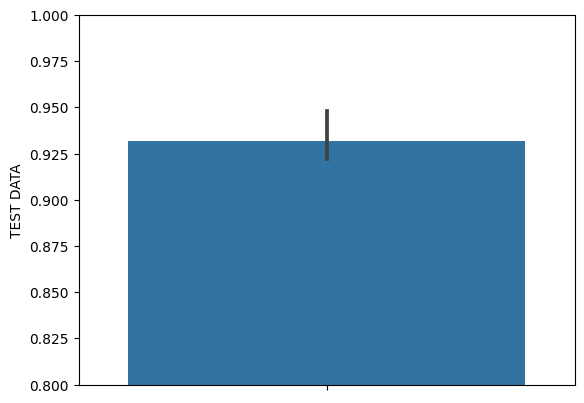

In [135]:
plt.figure()
sb.barplot(score_test,y='TEST DATA')
plt.ylim(0.8,1.0)

## the above accuracy score is for test data. In this model that is built we have score of 90+ so accuracy is pretty good.
## generally if there is a significant difference between the accuracy score of train data and test data this means that either the model is overfitted or underfitted.

In [136]:
cross_validating=cross_val_score( model,X_train, Y_train, cv=10)

C:\Users\Vishnu\anaconda3\envs\requirements\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vishnu\anaconda3\envs\requirements\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [137]:
cross_validating

array([0.93670886, 0.96202532, 0.92405063, 0.94936709, 0.91139241,
       0.91139241, 0.97468354, 0.96153846, 0.96153846, 0.94871795])

In [138]:
cross_validating.mean()

0.9441415124959429

## Anamoly Detection

In [139]:
data_for_anomaly_dect= cc_data.sample(frac = 0.1,random_state=1)

data_for_anomaly_dect.shape

(28481, 31)

In [140]:
Fraud_anomalydect = data_for_anomaly_dect[data_for_anomaly_dect['Class']==1]

Valid_anomalydect = data_for_anomaly_dect[data_for_anomaly_dect['Class']==0]

outlier_fraction = len(Fraud_anomalydect)/float(len(Valid_anomalydect))

In [141]:
columns = data_for_anomaly_dect.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X_ad = data_for_anomaly_dect[columns]
Y_ad = data_for_anomaly_dect[target]
X_outliers = state.uniform(low=0, high=1, size=(X_ad.shape[0], X_ad.shape[1]))
# Print the shapes of X & Y
print(X_ad.shape)
print(Y_ad.shape)

(28481, 30)
(28481,)


### Isolation Forest Algorithm & Local Outlier Factor(LOF) Algorithm

In [142]:
outlier_fraction = len(Fraud_anomalydect)/float(len(Valid_anomalydect))
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=1, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
   
}

In [143]:
n_outliers = len(Fraud_anomalydect)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_ad)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X_ad)
        scores_prediction = clf.decision_function(X_ad)
        y_pred = clf.predict(X_ad)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y_ad).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y_ad,y_pred))
    print("Classification Report :")
    print(classification_report(Y_ad,y_pred))

C:\Users\Vishnu\anaconda3\envs\requirements\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 77
Accuracy Score :
0.9972964432428637
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.22      0.22      0.22        49

    accuracy                           1.00     28481
   macro avg       0.61      0.61      0.61     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



#### Isolation Forest has a 99.74% more accurate than LOF of 99.65%

#### When comparing error precision & recall for 2 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 %.